In [ ]:
def draw_bboxes(image, bbox, color):
    if isinstance(bbox, tuple):
        cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), color, 2)
    else:
        image = cv2.polylines(image, [np.int32(bbox)], True, color, 3, cv2.LINE_AA)

    return image

In [ ]:
original_image = cv2.imread('data\\3.0.png', 0)
cropped_images = [cv2.imread(f'data\\3.{i}.png', 0) for i in range(1, 9)]

In [ ]:
from skimage.feature import hog
from skimage import exposure

def compute_hog(image):
    hog_features, hog_image = hog(image, visualize=True)
    hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    hog_image = (hog_image * 255).astype(np.uint8)
    return hog_features, hog_image

def find_best_match(original_hog_image, cropped_hog_image):
    result = cv2.matchTemplate(original_hog_image, cropped_hog_image, cv2.TM_CCOEFF_NORMED)
    _, max_val, _, max_loc = cv2.minMaxLoc(result)
    return max_loc, max_val

def HOG(original_image, cropped_image):
    original_hog_features, original_hog_image = compute_hog(original_image)
    cropped_hog_features, cropped_hog_image = compute_hog(cropped_image)
    
    max_loc, max_val = find_best_match(original_hog_image, cropped_hog_image)
    
    return max_loc, max_val


In [ ]:
idxs = []
hog_bboxes = []
for i, cropped_image in enumerate(cropped_images):
    loc, val = HOG(original_image, cropped_image)
    if val > 0.7:
        idxs.append(i + 1)
        h, w = cropped_image.shape[:2] 
        hog_bboxes.append((loc[0], loc[1], loc[0] + w, loc[1] + h))

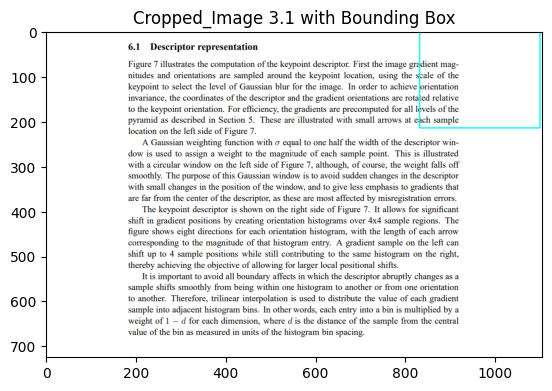

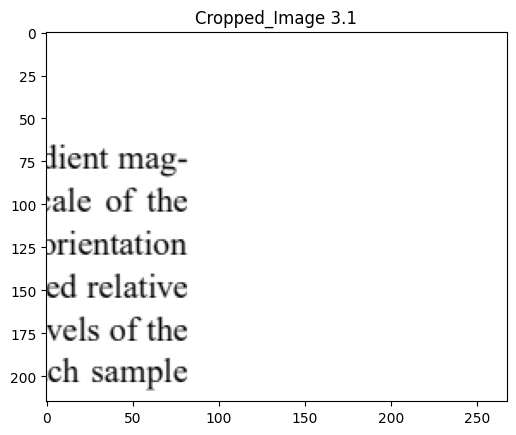

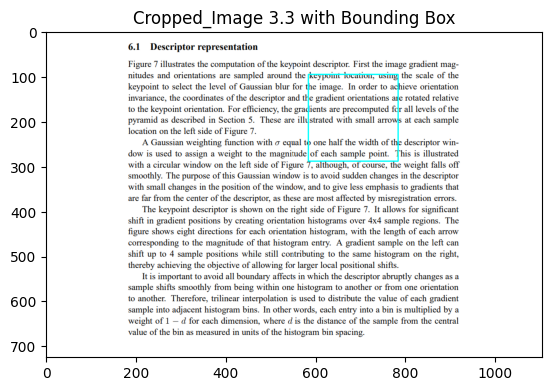

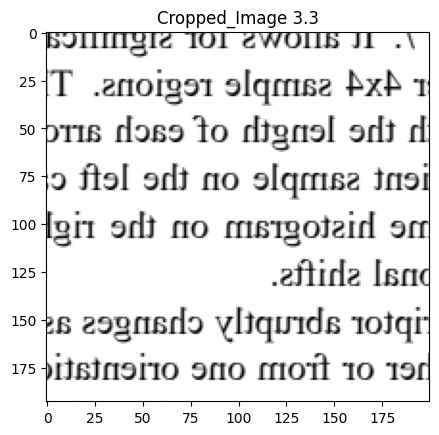

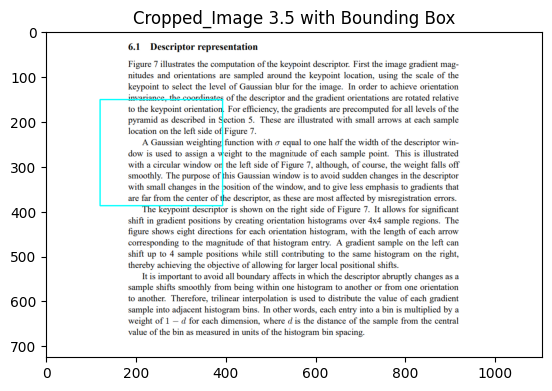

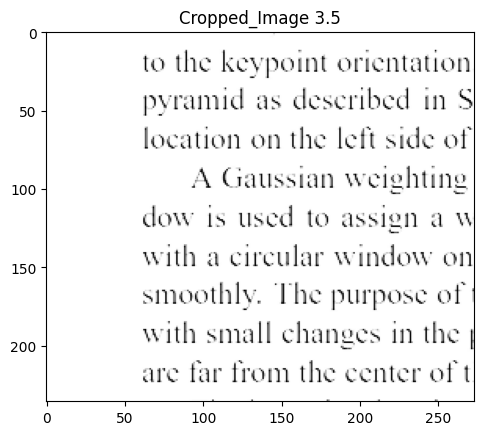

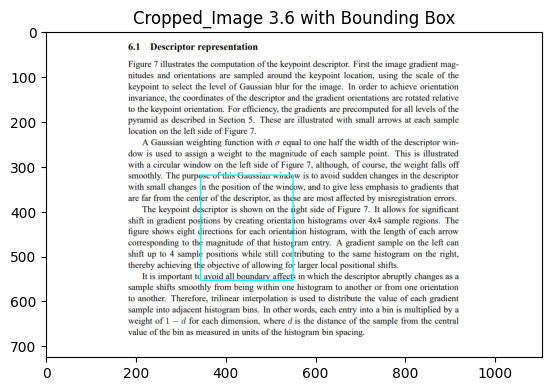

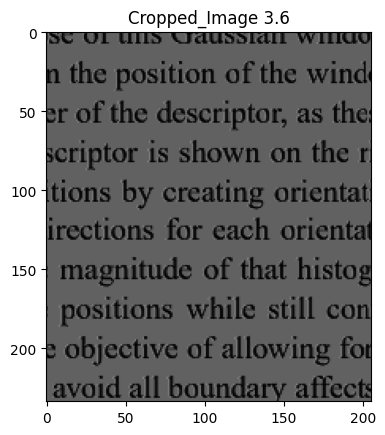

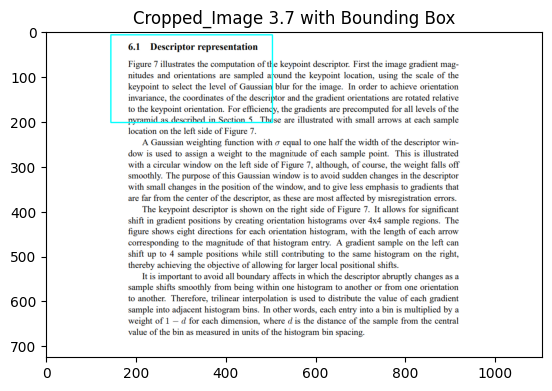

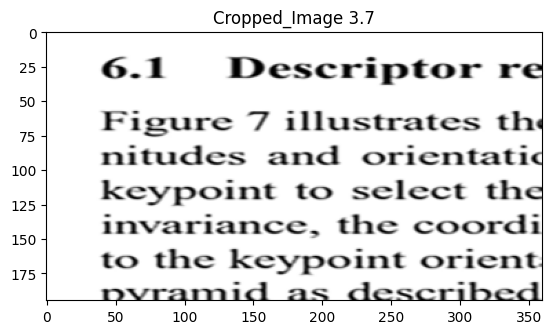

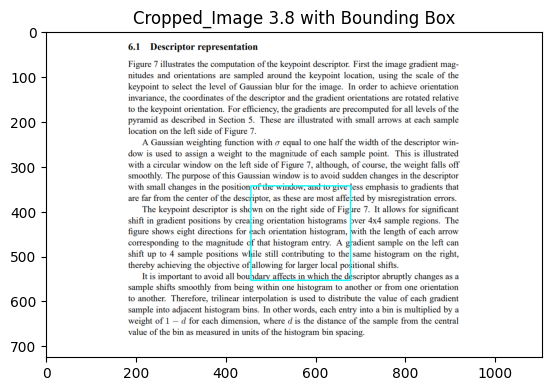

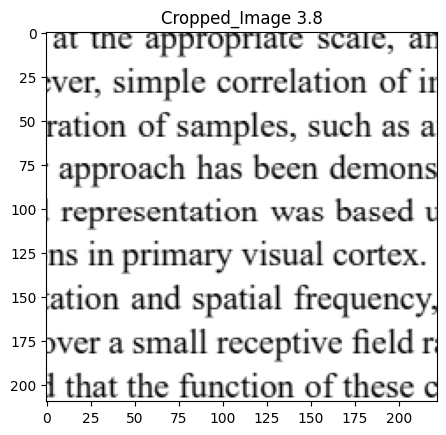

In [ ]:
for idx, hog_bbox in zip(idxs, hog_bboxes):
    original_image_hog = cv2.imread('data\\3.0.png')
    original_image_hog = draw_bboxes(original_image_hog, hog_bbox, (255, 255, 0))
    plt.imshow(cv2.cvtColor(original_image_hog, cv2.COLOR_BGR2RGB))
    plt.title(f'Cropped_Image 3.{idx} with Bounding Box')
    plt.show()

    plt.imshow(cv2.cvtColor(cropped_images[idx - 1], cv2.COLOR_BGR2RGB))
    plt.title(f'Cropped_Image 3.{idx}')
    plt.show()

    print('\n\n')
